In [1]:
#!pip install hvplot

In [2]:
import pandas as pd
from os import getcwd, path
import hvplot.pandas
from bokeh.models import NumeralTickFormatter
import hvplot as hv
import numpy as np
import requests
from io import StringIO
from bokeh.io.export import get_screenshot_as_png

Импорт библиотек и зависимостей

In [3]:
try:
    df = pd.read_csv(path.join(getcwd(), "train.csv"), na_values=[""])
except FileNotFoundError:
    print("Файл trains.csv не найден в рабочей директории, попытка загрузки из источника...")
    res = requests.get('https://docs.google.com/spreadsheet/ccc?key=1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs&output=csv&gid=1477722452')
    if res.status_code != 200:
        print("Не удалось загрузить файл из источника")
        raise requests.exceptions.HTTPError
    df = pd.read_csv(StringIO(str(res.content,'utf-8')))
    print("Данные загружены")

Загрузка датасета из текущей рабочей директории или google sheets таблицы.

In [4]:
float_format = NumeralTickFormatter(format="0.00")

Формат вещественных чисел для графиков

## Обзор датасета

In [5]:
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


Датасет не содержит пропусков, объём - 9800 записей.

## Приведение типов данных и индексов

In [7]:
df.columns = df.columns.str.replace(r"-| ", "_", regex=True).str.lower()

Приведение названия заголовков к стилю snake_case

In [8]:
df['sales'] = df['sales'].str.replace(",", ".")
df["region"] = df["region"].str.replace("Калиниград", "Калининград")

In [9]:
df["sales"] = df["sales"].astype("float64")
df["order_date"] = df["order_date"].astype("datetime64[ns]")

In [10]:
df.describe()

,id,order_date,sales
count,9800.000000,9800,9800.000000
mean,4900.500000,2017-04-12 14:24:35.265306112,22921.757737
min,1.000000,2015-01-02 00:00:00,1002.794000
25%,2450.750000,2016-05-02 12:00:00,12135.625000
50%,4900.500000,2017-05-30 00:00:00,22882.060000
75%,7350.250000,2018-04-11 00:00:00,33730.130000
max,9800.000000,2018-12-30 00:00:00,44995.410000
std,2829.160653,NaN,12601.999815


In [11]:
df.duplicated(subset=["id", "order_date", "class", "sub_category", "region"]).sum()

0

Количество явных дубликатов

# Задание 1

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

Подгруппа – Sub-Category
 
Дата – Order_date
 
Сделать вывод на основе полученных результатов.

In [12]:
a_df = df.pivot_table(index="sub_category", values=["sales"], aggfunc="count")
a_plot = a_df.sort_values("sales").hvplot(kind="bar", yformatter=float_format, title="All sales", rot=90)
a_plot

:Bars   [sub_category]   (sales)

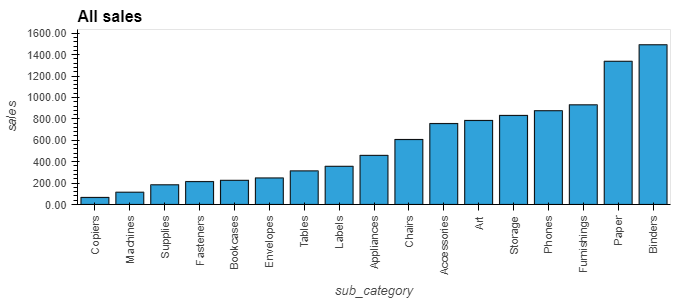

Здесь и далее интерактивные графики будут сопровождаться статичными картинками 

а) За всё время продаж чаще всего покупают товары из подгрупп: Binders, Paper, Furnishings, Phones.

In [13]:
last_date = df["order_date"].max()
two_years_below_date = pd.Timestamp(year=last_date.year - 2, month=last_date.month, day=last_date.day)
year_below_date = pd.Timestamp(year=last_date.year - 1, month=last_date.month, day=last_date.day)
last_date, two_years_below_date, year_below_date

(Timestamp('2018-12-30 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-12-30 00:00:00'))

In [14]:
last_two_years_df = df[df["order_date"] >= two_years_below_date]

In [15]:
last_year_df = df[df["order_date"] >= year_below_date]

In [16]:
b_df = last_two_years_df.pivot_table(index="sub_category", values=["sales"], aggfunc="count")
b_plot = b_df.sort_values("sales").hvplot(kind="bar",title="Last 2 years sales",yformatter=float_format, ylabel="last_2_years_sales", rot=90)
b_plot

:Bars   [sub_category]   (sales)

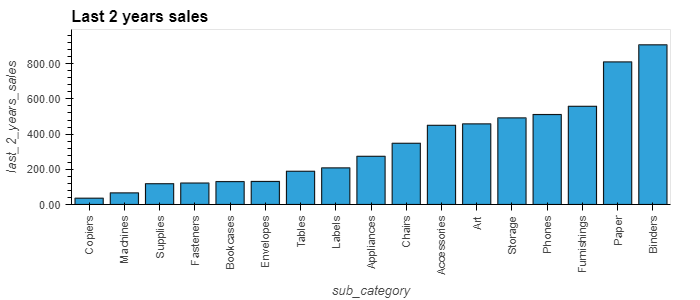

б) За последние 2 года чаще всего покупают товары из подгрупп: Binders, Paper, Furnishings, Phones. Они совпадают с популярными группами за весь рассматриваемый период.

In [17]:
c_df = last_year_df.pivot_table(index="sub_category", values=["sales"], aggfunc="count")
c_plot = c_df.sort_values("sales").hvplot(kind="bar", title="Last year sales", yformatter=float_format, ylabel="last_year_sales", rot=90)
c_plot

:Bars   [sub_category]   (sales)

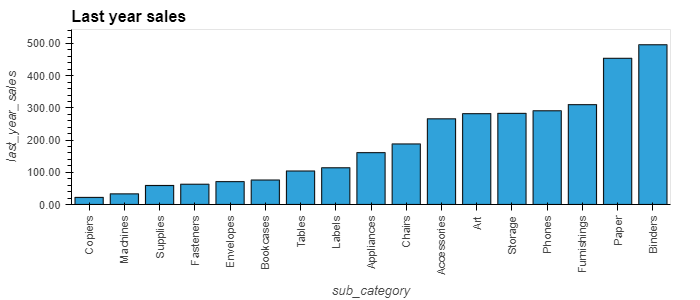

In [18]:
res_df = pd.concat([a_df, b_df, c_df], axis=1)
res_df.columns=["all_sales", "last_2_years_sales", "last_year_sales"]
res_df

,all_sales,last_2_years_sales,last_year_sales
sub_category,,,
Accessories,756,450,266
Appliances,459,274,161
Art,785,458,282
Binders,1492,907,496
Bookcases,226,130,76
Chairs,607,348,188
Copiers,66,36,22
Envelopes,248,131,71
Fasteners,214,122,63


In [19]:
res_df.sort_values("all_sales").hvplot.bar(stacked=True, yformatter=float_format, rot=90)

:Bars   [sub_category,Variable]   (value)

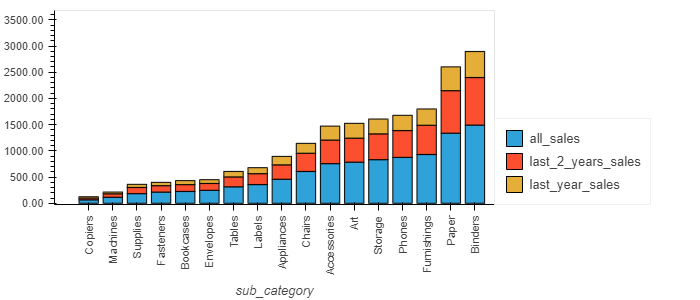

в) За последний год чаще всего покупают товары из подгрупп: Binders, Paper, Furnishings, Phones. Они совпадают с популярными группами за весь рассматриваемый период.

### Вывод

За последние 2 года группа популярных подгрупп и порядок в ней не изменились.

# Задание 2
    
Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

In [20]:
df.hvplot.box(y="sales")

:BoxWhisker   (sales)

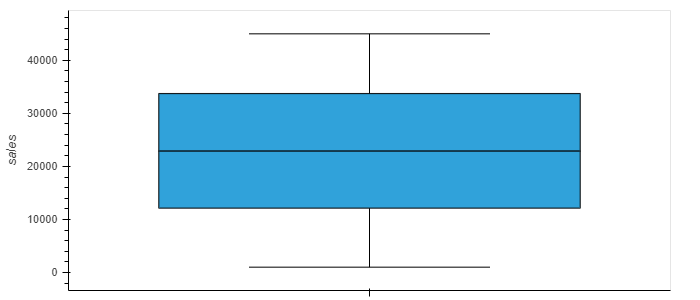

In [21]:
df['sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: sales, dtype: float64

In [22]:
df.hvplot.box(y='sales', by="sub_category", subplots=True, rot=90).opts(width=800, height=600)

:BoxWhisker   [sub_category]   (sales)

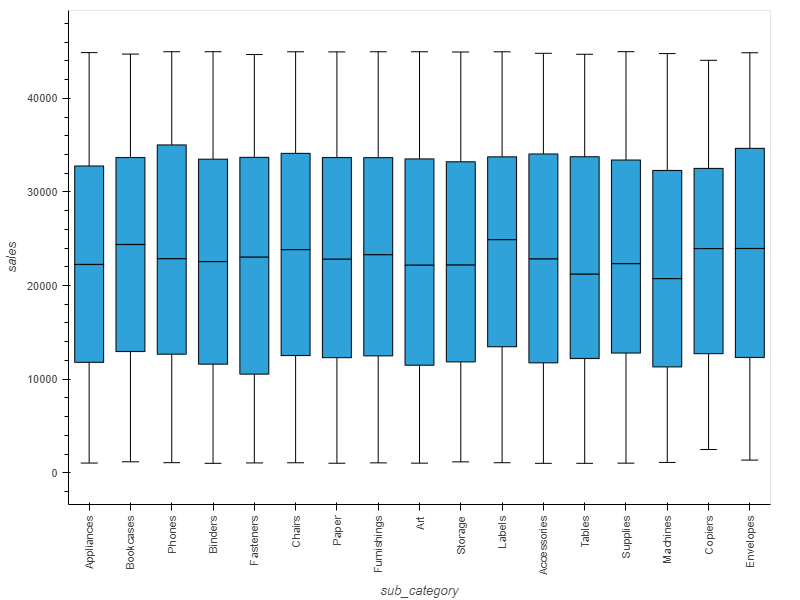

In [23]:
for by in df['sub_category'].unique():
    display(by)
    display(df[df['sub_category'] == by]['sales'].describe())

'Appliances'

count      459.000000
mean     22579.911765
std      12663.538443
min       1032.233000
25%      11797.605000
50%      22251.810000
75%      32775.080000
max      44896.370000
Name: sales, dtype: float64

'Bookcases'

count      226.000000
mean     23686.751155
std      11970.653117
min       1169.509000
25%      12954.672500
50%      24383.490000
75%      33679.222500
max      44736.680000
Name: sales, dtype: float64

'Phones'

count      876.000000
mean     23222.906346
std      12693.116145
min       1073.054000
25%      12668.252500
50%      22862.615000
75%      35027.645000
max      44990.440000
Name: sales, dtype: float64

'Binders'

count     1492.000000
mean     22729.205293
std      12648.437302
min       1002.794000
25%      11602.850000
50%      22551.955000
75%      33505.270000
max      44992.430000
Name: sales, dtype: float64

'Fasteners'

count      214.000000
mean     22146.975341
std      13343.590286
min       1046.917000
25%      10535.027500
50%      23032.550000
75%      33699.880000
max      44688.630000
Name: sales, dtype: float64

'Chairs'

count      607.000000
mean     23271.306198
std      12319.924047
min       1063.685000
25%      12523.230000
50%      23831.500000
75%      34127.100000
max      44983.640000
Name: sales, dtype: float64

'Paper'

count     1338.000000
mean     22937.793924
std      12587.128366
min       1012.536000
25%      12294.505000
50%      22813.425000
75%      33681.140000
max      44971.430000
Name: sales, dtype: float64

'Furnishings'

count      931.000000
mean     23163.336149
std      12406.285415
min       1054.155000
25%      12487.095000
50%      23286.620000
75%      33668.420000
max      44986.260000
Name: sales, dtype: float64

'Art'

count      785.000000
mean     22716.513772
std      12585.959000
min       1021.593000
25%      11487.450000
50%      22173.510000
75%      33533.620000
max      44986.160000
Name: sales, dtype: float64

'Storage'

count      832.000000
mean     22707.697303
std      12758.414223
min       1160.219000
25%      11844.487500
50%      22190.055000
75%      33228.830000
max      44958.420000
Name: sales, dtype: float64

'Labels'

count      357.000000
mean     23721.531557
std      12526.018921
min       1070.142000
25%      13462.940000
50%      24898.900000
75%      33754.580000
max      44982.710000
Name: sales, dtype: float64

'Accessories'

count      756.000000
mean     22850.459716
std      12750.349489
min       1003.082000
25%      11740.542500
50%      22839.210000
75%      34062.495000
max      44819.860000
Name: sales, dtype: float64

'Tables'

count      314.000000
mean     22261.283303
std      12859.042512
min       1003.457000
25%      12206.915000
50%      21213.165000
75%      33767.487500
max      44716.810000
Name: sales, dtype: float64

'Supplies'

count      184.000000
mean     22800.558815
std      12260.274383
min       1021.104000
25%      12790.450000
50%      22334.970000
75%      33414.172500
max      44995.410000
Name: sales, dtype: float64

'Machines'

count      115.000000
mean     22061.570061
std      12456.676865
min       1096.997000
25%      11307.435000
50%      20735.850000
75%      32300.040000
max      44794.020000
Name: sales, dtype: float64

'Copiers'

count       66.000000
mean     23374.989621
std      12674.199281
min       2479.412000
25%      12721.182500
50%      23944.560000
75%      32518.087500
max      44072.450000
Name: sales, dtype: float64

'Envelopes'

count      248.000000
mean     23409.891379
std      12642.667645
min       1349.644000
25%      12318.267500
50%      23956.990000
75%      34663.007500
max      44878.760000
Name: sales, dtype: float64

Обзор распределения sales по подкатегориям.

### Вывод

Sales распределено равномерно как на всём интервале, так и при группировке по любому категориальному признаку. Устранять выбросы нет необходимости.

# Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

Разбиение происходит по квартилям в рамках каждого региона: 1-й квартиль, 2-3 квартиль, 4 квартиль.

In [24]:
df["sale_group"] = "small"

In [25]:
for by in df['region'].unique():
    reg_sales = df[df['region'] == by]['sales']
    df.loc[(df["sales"] >= reg_sales.quantile(0.25)) & (df.index.isin(reg_sales.index)), "sale_group"] = "medium"
    df.loc[(df["sales"] >= reg_sales.quantile(0.75)) & (df.index.isin(reg_sales.index)), "sale_group"] = "big"

In [26]:
reg_sales_sum = df.pivot_table(index="region", values="sales", aggfunc="sum")

In [27]:
reg_group_sales_sum = df.pivot_table(index=["region", "sale_group"], values="sales", aggfunc=["sum"])
reg_group_sales_sum

sum
                               sales
region      sale_group              
Владивосток big         2.751928e+07
            medium      3.201702e+07
            small       4.416384e+06
Калининград big         3.078471e+07
            medium      3.580728e+07
            small       5.338313e+06
Москва      big         1.575436e+07
            medium      1.851146e+07
            small       2.625824e+06
Урал        big         2.231204e+07
            medium      2.582963e+07
            small       3.716921e+06

In [28]:
reg_group_sales_sum['percent'] = reg_group_sales_sum["sum"]["sales"] / reg_group_sales_sum.index.get_level_values(0).map(reg_sales_sum.to_dict()["sales"]).values

In [29]:
reg_group_sales_sum

sum   percent
                               sales          
region      sale_group                        
Владивосток big         2.751928e+07  0.430307
            medium      3.201702e+07  0.500636
            small       4.416384e+06  0.069057
Калининград big         3.078471e+07  0.427980
            medium      3.580728e+07  0.497805
            small       5.338313e+06  0.074215
Москва      big         1.575436e+07  0.427044
            medium      1.851146e+07  0.501779
            small       2.625824e+06  0.071177
Урал        big         2.231204e+07  0.430248
            medium      2.582963e+07  0.498078
            small       3.716921e+06  0.071674

In [30]:
df.pivot_table(index=["region", "sale_group"], values="sales", aggfunc="sum").hvplot(kind="bar", title="Region / Sales", yformatter=float_format, rot=90)

:Bars   [region,sale_group]   (sales)

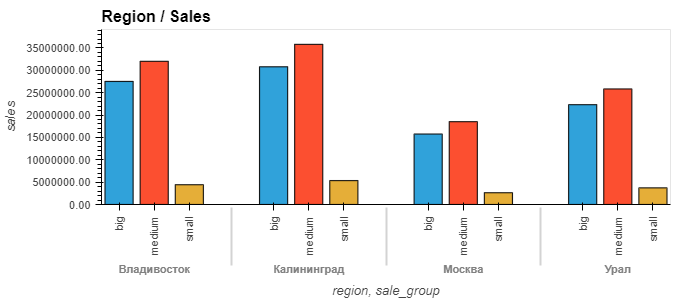

### Вывод

Основные тенденции и паттерны:
- в каждом регионе доля продаж среднего объёма составляет около 50%;
- в каждом регионе доля низкого объём продаж составляет около 7%;
- в каждом регионе доля высокого объёма продаж составляет около 43%;
- абсолютный показатель продаж возрастает по регионам в порядке: Москва, Урал, Владивосток, Калининград.

Визуально можно определить наиболее прибыльную группу - средние продажи.